# Emilio Hernández Arellano

# Tarea 4

# Preeliminares

In [95]:
#Definiendo las clases
l_class = {
    "MW":"caminar",
    "MR" : "Correr",
    "MJ" : "Saltar",
    "WD" : "Bajar escaleras",
    "WU" : "Subir escaleras",
    "FF" : "Caida hacia adelante",
    "FS" : "Caida lateral",
    "FB" : "Caida hacia atras",
    "LD" : "Tumbado",
    "OT" : "Otras clases"
}

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tsfel
import zipfile
import os
from glob import glob

In [63]:
"Extrayendo zips"

def unzip (path):
    with zipfile.ZipFile(path, 'r') as zip_ref:
    # Extrae todos los archivos en el directorio actual
        zip_ref.extractall(".")
        zip_ref.close()

In [25]:
"""
Con esto se trata de extraer los archivos zip.mro
La función Unzip puede ejecutarse varias veces o una única vez, para ello
se le agregará los archivos zip con las rutas en caso de ser distintas
"""

path_zip_1 = "C:/Users/millo/Documents/CICESE/Ciencia de Datos\Ejercicio_4/1.zip"
path_zip_2 = "C:/Users/millo/Documents/CICESE/Ciencia de Datos\Ejercicio_4/2.zip"
path_zip_3 = "C:/Users/millo/Documents/CICESE/Ciencia de Datos\Ejercicio_4/3.zip"

unzip(path_zip_3)

In [27]:
#Código para las variables de los path

del path_zip_1,path_zip_2,path_zip_3

# Entrenamiento

## Archivo individual de prueba

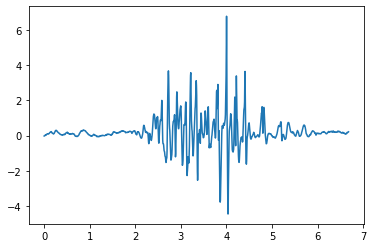

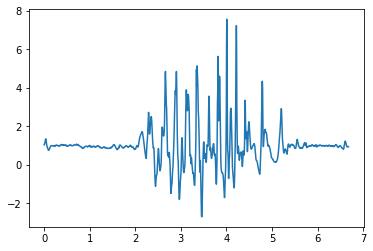

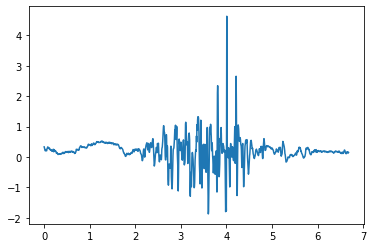

In [101]:
path_csv_individual = "C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/Jhon Doe/Folder_file001_MR.csv"
df = pd.read_csv(path_csv_individual,names=["x","y","z","Time"])
x = df["x"]
y = df["y"]
z = df["z"]

#Creando vector de tiempo propio

l = len(x)
fs = 200
time = np.linspace(0,1/fs*l,l)
len(time)

#Ploteando las señales

plt.figure()
plt.plot(time,x)
plt.figure()
plt.plot(time,y)
plt.figure()
plt.plot(time,z)

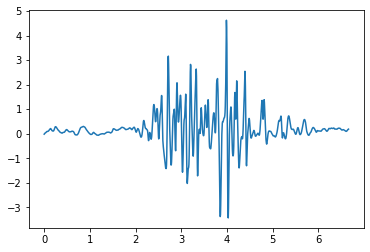

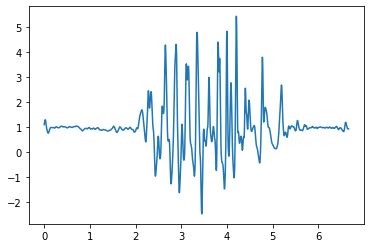

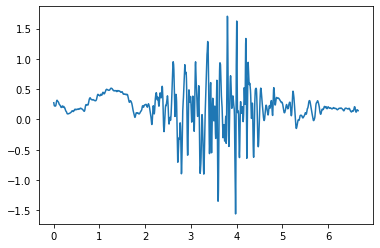

In [103]:
#Aplicando filtro media movil
n = 5

x1 = pd.Series (x) .rolling (window = n) .mean (). iloc [n-1:]. values
y1 = pd.Series (y) .rolling (window = n) .mean (). iloc [n-1:]. values
z1 = pd.Series (z) .rolling (window = n) .mean (). iloc [n-1:]. values

#Creando vector de tiempo propio
l = len(x1)
fs = 200
time = np.linspace(0,1/fs*l,l)

plt.figure()
plt.plot(time,x1)
plt.figure()
plt.plot(time,y1)
plt.figure()
plt.plot(time,z1)
#del x_file_csv,y_file_csv,z_file_csv

In [86]:
# Extrayendo sus características

cfg_file = tsfel.get_features_by_domain() 
x_f = tsfel.time_series_features_extractor(cfg_file,x,fs=fs)
y_f = tsfel.time_series_features_extractor(cfg_file,y,fs=fs)
z_f = tsfel.time_series_features_extractor(cfg_file,z,fs=fs)

In [88]:
#Obteniendo un único vector de características de 1167
df_f = pd.concat([x_f,y_f,z_f],axis=1)
df_f

,0_FFT mean coefficient_0,0_FFT mean coefficient_1,0_FFT mean coefficient_2,0_FFT mean coefficient_3,0_FFT mean coefficient_4,0_FFT mean coefficient_5,0_FFT mean coefficient_6,0_FFT mean coefficient_7,0_FFT mean coefficient_8,0_FFT mean coefficient_9,...,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Peak to peak distance,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Total energy,0_Zero crossing rate
0,0.000614,0.005657,0.002219,0.003554,0.006543,0.015596,0.01872,0.024112,0.001978,0.005876,...,-0.0016,242.0,49.0,6.4996,242.0,1363.140342,-0.000103,125.031168,39.783996,76.0


## Ejecutando extracción

In [93]:
def labelFile (file_basename):
    last = file_basename.split("_")[-1]
    label_file = last.split(".")[0]
    return label_file

In [144]:
"""
Entra como argumento el archivo csv en la variable d

Si se desea aplicar un filtro LP de media movil se debe:
    Establecer m_movil = True
    n el tamaño de la ventana del filtro >=1 

Fs = 200 
"""
def features_csv (d,m_movil=False,n=0,fs = 200):
    x = d["x"]
    y = d["y"]
    z = d["z"]
    if n >= 1 and m_movil:
        x = pd.Series (x) .rolling (window = n) .mean (). iloc [n-1:]. values
        y = pd.Series (y) .rolling (window = n) .mean (). iloc [n-1:]. values
        z = pd.Series (z) .rolling (window = n) .mean (). iloc [n-1:]. values  
    x_f = tsfel.time_series_features_extractor(cfg_file,x,fs=fs)
    y_f = tsfel.time_series_features_extractor(cfg_file,y,fs=fs)
    z_f = tsfel.time_series_features_extractor(cfg_file,z,fs=fs)
    return pd.concat([x_f,y_f,z_f],axis=1)



In [152]:
#Función para extraer características
#Si train = False indica que es para evaluación por lo que no se extraen las clases y solo se sacan las características
def load_data(path,train=True):
    features = []
    labels = [] if train == True else None
    for file in glob(path):
        basename = os.path.basename(file)
        df = pd.read_csv(file,names=["x","y","z","Time"])
        label = labelFile(basename) if train == True else None #Asignando nombre a las columnas, para más adelante
        feature = features_csv(df)
        if train == True and label in l_class and feature is not None:
            labels.append(l_class[label])
            features.append(feature)
        elif label not in  l_class and train == True and feature is not None:
            print(file)
        elif train == False and feature is not None:
            features.append(feature)
    if train:
        return pd.concat(features), labels
    else:
        return pd.concat(features)
        

path_train = "C:/Users/millo/Documents/CICESE/Ciencia de Datos/Ejercicio_4/*/*.csv"


In [155]:
# Obteniendo clases y características de la señal original
f,l = load_data(path_train)

In [158]:
f_w,l_w = load_data(path_train)

In [156]:
f

,0_FFT mean coefficient_0,0_FFT mean coefficient_1,0_FFT mean coefficient_2,0_FFT mean coefficient_3,0_FFT mean coefficient_4,0_FFT mean coefficient_5,0_FFT mean coefficient_6,0_FFT mean coefficient_7,0_FFT mean coefficient_8,0_FFT mean coefficient_9,...,0_Median diff,0_Negative turning points,0_Neighbourhood peaks,0_Peak to peak distance,0_Positive turning points,0_Signal distance,0_Slope,0_Sum absolute diff,0_Total energy,0_Zero crossing rate
0,0.000614,0.005657,0.002219,0.003554,0.006543,0.015596,0.018720,0.024112,0.001978,0.005876,...,-0.001600,242.0,49.0,6.49960,242.0,1363.140342,-0.000103,125.031168,39.783996,76.0
0,0.000231,0.002280,0.000468,0.000617,0.010201,0.021543,0.011712,0.010103,0.006973,0.010024,...,-0.000079,352.0,62.0,7.61550,351.0,1709.581337,0.000020,140.499070,30.219002,128.0
0,0.001279,0.001085,0.000963,0.003116,0.010145,0.026556,0.020661,0.017043,0.007096,0.007899,...,0.000200,335.0,58.0,5.88830,335.0,1541.326574,0.000107,115.328179,27.592990,108.0
0,0.000093,0.007297,0.002841,0.002830,0.003735,0.045995,0.060071,0.003737,0.001943,0.028874,...,-0.000503,263.0,62.0,5.38470,264.0,1499.231897,-0.000007,165.288218,47.452247,86.0
0,0.000688,0.008461,0.018864,0.005120,0.027442,0.066679,0.026857,0.028127,0.030815,0.048509,...,0.001292,343.0,67.0,7.81570,343.0,1897.562233,-0.000124,213.836528,70.836885,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.000012,0.044569,0.006738,0.003888,0.005153,0.012284,0.009531,0.008644,0.001405,0.003348,...,0.000310,485.0,82.0,7.95367,484.0,2138.577513,0.000224,60.138484,57.722886,10.0
0,0.001796,0.089647,0.046301,0.042041,0.026273,0.017034,0.013347,0.005938,0.018987,0.022106,...,0.000200,220.0,45.0,6.59691,221.0,1218.359208,0.000086,39.943434,30.226689,46.0
0,0.000205,0.227518,0.010201,0.030711,0.025926,0.009963,0.011129,0.010573,0.010821,0.011083,...,-0.000345,270.0,48.0,7.40258,269.0,1384.734449,0.000188,44.766716,52.196017,24.0
0,0.000883,0.130701,0.031792,0.032586,0.011714,0.017654,0.004982,0.001677,0.001906,0.006485,...,0.000265,278.0,55.0,6.89249,278.0,1450.874222,0.000182,48.188877,54.876073,44.0


## Ejecutando los clasificadores

In [224]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import f1_score
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report

#### Señal entera y sin reducción de dimensionalidad

In [230]:
X = f.values
y = np.array(l)

In [232]:
### Random Forest

forest_int_wred = RandomForestClassifier()
y_pred = []
scores = []
test_split = []
kf = KFold(n_splits=10,random_state=42,shuffle=True)
for i,(train_index,test_index) in enumerate (kf.split(X)):
    test_split.append(test_index)
    X_train, X_test = X[train_index],X[test_index]
    y_train, y_test = y[train_index],y[test_index]
    forest_int_wred.fit(X_train,y_train)
    y_p = forest_int_wred.predict(X_test)
    score = forest_int_wred.score(X_test,y_test)
    y_pred.append(y_p)
    scores.append(score)

# Imprimir resultados
print("Con el modelo de SVM se tiene un accuracy de %0.2f y una std: %0.2f" 
% (np.mean(scores), np.std(scores) * 2))

""""Al ocupar un random state se tiene que volver a ordenar las listas
tanto de los índices que se ocuparon como prueba y por correspondiente las clases obtenidas con el model"""
t_split = np.concatenate(test_split).tolist()
y_pred_1 = np.concatenate(y_pred).tolist()
tuples = zip(t_split,y_pred_1)
sorted_tuples = sorted(tuples)
t_sorted_split, y_sorted_pred = zip(*sorted_tuples)
print(classification_report(y,y_sorted_pred))


Con el modelo de SVM se tiene un accuracy de 0.95 y una std: 0.12
                      precision    recall  f1-score   support

     Bajar escaleras       1.00      1.00      1.00        13
Caida hacia adelante       1.00      1.00      1.00        10
   Caida hacia atras       0.82      0.90      0.86        10
       Caida lateral       0.82      0.90      0.86        10
              Correr       1.00      0.93      0.97        15
        Otras clases       0.94      1.00      0.97        15
              Saltar       0.91      1.00      0.95        10
     Subir escaleras       1.00      1.00      1.00        13
             Tumbado       1.00      0.40      0.57         5
             caminar       1.00      1.00      1.00        15

            accuracy                           0.95       116
           macro avg       0.95      0.91      0.92       116
        weighted avg       0.95      0.95      0.94       116



In [235]:
svm_int_wred = svm.SVC(kernel = "linear")
y_pred = []
scores = []
test_split = []
kf = KFold(n_splits=10,random_state=42,shuffle=True)
for i,(train_index,test_index) in enumerate (kf.split(X)):
    test_split.append(test_index)
    X_train, X_test = X[train_index],X[test_index]
    y_train, y_test = y[train_index],y[test_index]
    svm_int_wred.fit(X_train,y_train)
    y_p = svm_int_wred.predict(X_test)
    score = svm_int_wred.score(X_test,y_test)
    y_pred.append(y_p)
    scores.append(score)

# Imprimir resultados
print("Con el modelo de SVM se tiene un accuracy de %0.2f y una std: %0.2f" 
% (np.mean(scores), np.std(scores) * 2))

""""Al ocupar un random state se tiene que volver a ordenar las listas
tanto de los índices que se ocuparon como prueba y por correspondiente las clases obtenidas con el model"""
t_split = np.concatenate(test_split).tolist()
y_pred_1 = np.concatenate(y_pred).tolist()
tuples = zip(t_split,y_pred_1)
sorted_tuples = sorted(tuples)
t_sorted_split, y_sorted_pred = zip(*sorted_tuples)
print(classification_report(y,y_sorted_pred))
